In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## LAB1 - Perceptron and Gradient Descent

### Single layer perceptron

In [6]:
@staticmethod
def plot_input(X, y, w):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Accent')
    k = np.linspace(-1,2,100)
    a = -w[0]/w[1]
    ky = a*k -(w[2]/w[1])
    plt.plot(k,ky)
    plt.show()

@staticmethod
def check_err(y,yq):
    return np.sum(y-yq)

class Percep:
    def __init__(perc, N, lr=0.1):
        perc.W = np.random.randn(N+1)/np.sqrt(N)
        perc.lr = lr

    def step(perc, X):
        return 1 if X>0 else 0

       
    def fit(perc, X, y, epoch=10):
        X = np.c_[X, np.ones((X.shape[0]))]
        print(X)
        for i,j in zip(X,y):
            print(f"Input X1:{int(i[0])}, X2:{int(i[1])} and gate {j}")
        error = 0
        for ep in np.arange(0,epoch):
            
            
            for (x,yy) in zip(X,y):
                p = perc.step(np.dot(x,perc.W))
                
                if p != yy:
                    err = p - yy
                    print(f"error at epoch {ep} for sample {x} is {err}")
                    upd = perc.lr*err*x
                    print(f"updating weights {perc.W} for sample {x} by {upd}")
                    perc.W += -upd
                    print(f"new weights {perc.W}")
                    print(f"add error = {error}")
                    plot_input(X, y, perc.W)

               
                   

    def predict(perc, X, bias=True):
        X = np.atleast_2d(X)
        if bias:
            X = np.c_[X, np.ones((X.shape[0]))]

        return perc.step(np.dot(X, perc.W))

In [7]:
class make_gates:
    def __init__(gate):
        gate.X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    def data(gate, list_gates:str):
        if list_gates.lower() == "or":
            gate.y = np.array([[0], [1], [1], [1]])
            return gate.X,gate.y
        elif list_gates.lower() == "and":
            gate.y = np.array([[0], [0], [0], [1]])
            return gate.X,gate.y
        elif list_gates.lower() == "nand":
            gate.y = np.array([[1], [1], [1], [0]])
            return gate.X, gate.y

        elif list_gates.lower() == "xor":
            gate.y = np.array([[0], [1], [1], [0]])
            return gate.X, gate.y
            

X, y = make_gates().data("xor")

Enter perceptron training...
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Input X1:0, X2:0 and gate [0]
Input X1:0, X2:1 and gate [1]
Input X1:1, X2:0 and gate [1]
Input X1:1, X2:1 and gate [0]
error at epoch 0 for sample [1. 0. 1.] is [-1]
updating weights [-2.13490236  0.85961213 -0.43980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-1.93490236  0.85961213 -0.23980943]
add error = 0


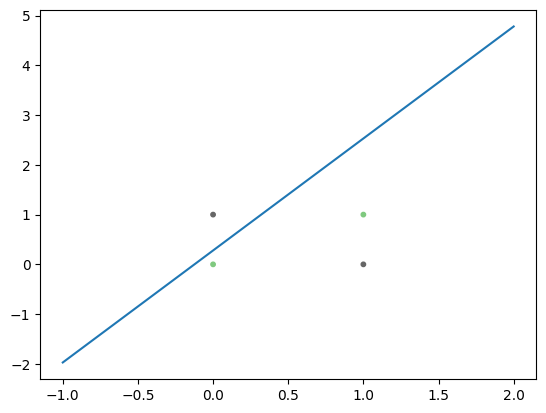

error at epoch 1 for sample [1. 0. 1.] is [-1]
updating weights [-1.93490236  0.85961213 -0.23980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-1.73490236  0.85961213 -0.03980943]
add error = 0


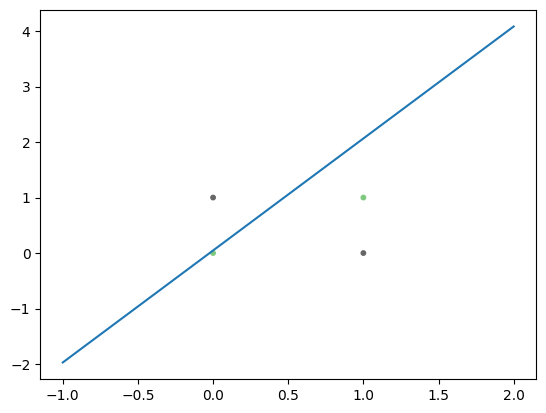

error at epoch 2 for sample [1. 0. 1.] is [-1]
updating weights [-1.73490236  0.85961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-1.53490236  0.85961213  0.16019057]
add error = 0


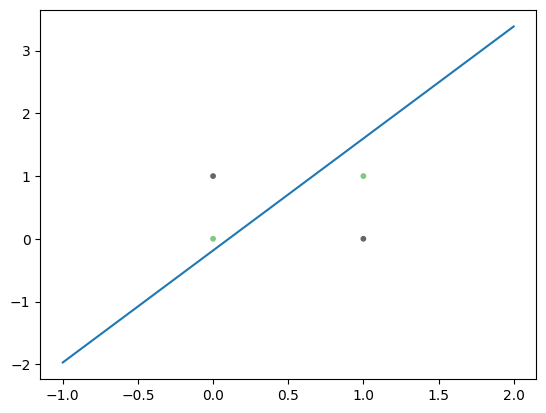

error at epoch 3 for sample [0. 0. 1.] is [1]
updating weights [-1.53490236  0.85961213  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-1.53490236  0.85961213 -0.03980943]
add error = 0


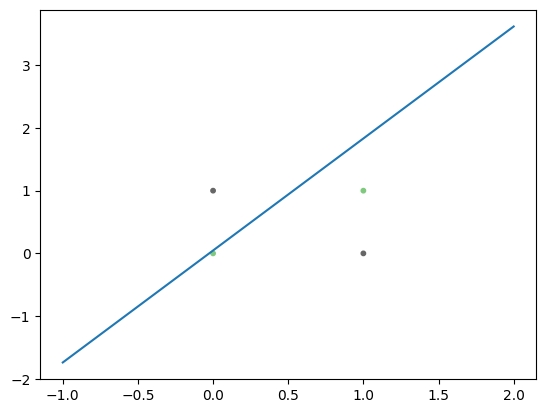

error at epoch 3 for sample [1. 0. 1.] is [-1]
updating weights [-1.53490236  0.85961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-1.33490236  0.85961213  0.16019057]
add error = 0


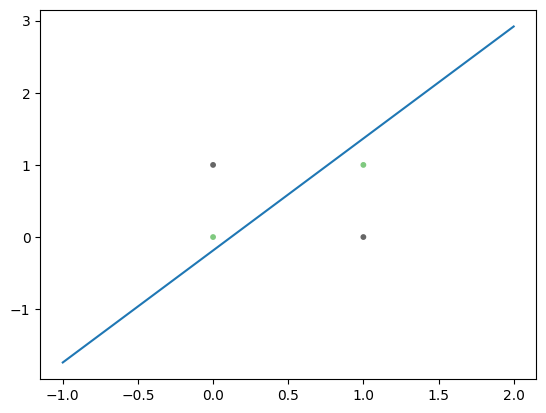

error at epoch 4 for sample [0. 0. 1.] is [1]
updating weights [-1.33490236  0.85961213  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-1.33490236  0.85961213 -0.03980943]
add error = 0


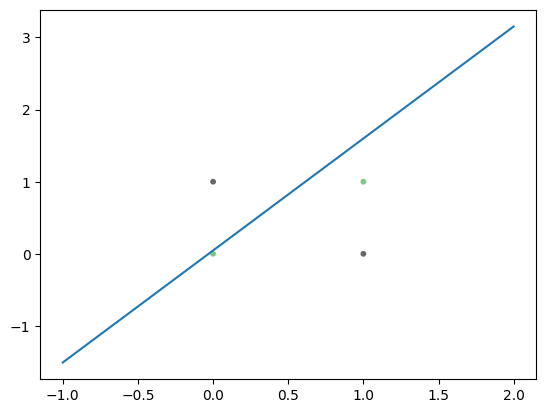

error at epoch 4 for sample [1. 0. 1.] is [-1]
updating weights [-1.33490236  0.85961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-1.13490236  0.85961213  0.16019057]
add error = 0


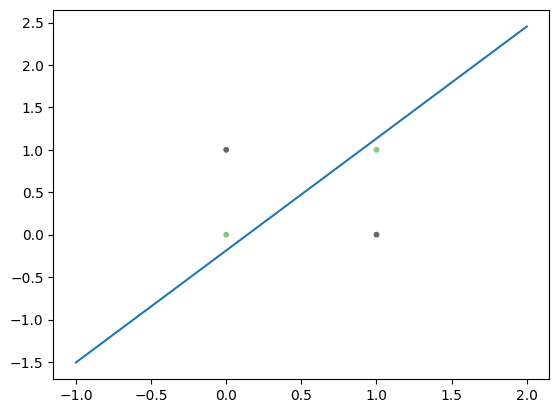

error at epoch 5 for sample [0. 0. 1.] is [1]
updating weights [-1.13490236  0.85961213  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-1.13490236  0.85961213 -0.03980943]
add error = 0


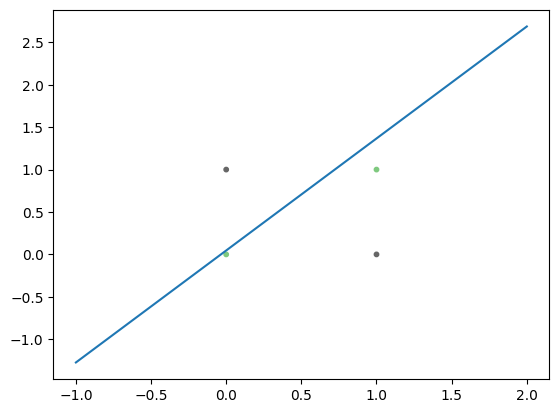

error at epoch 5 for sample [1. 0. 1.] is [-1]
updating weights [-1.13490236  0.85961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.93490236  0.85961213  0.16019057]
add error = 0


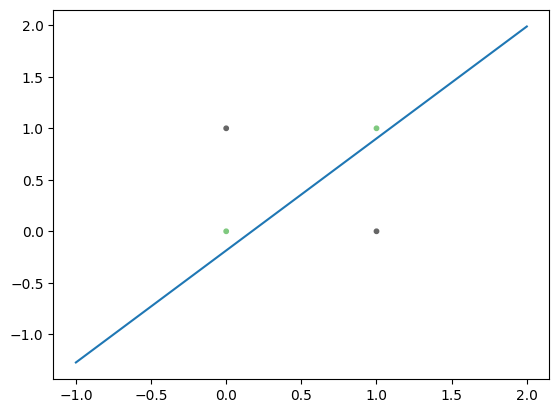

error at epoch 5 for sample [1. 1. 1.] is [1]
updating weights [-0.93490236  0.85961213  0.16019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-1.13490236  0.65961213 -0.03980943]
add error = 0


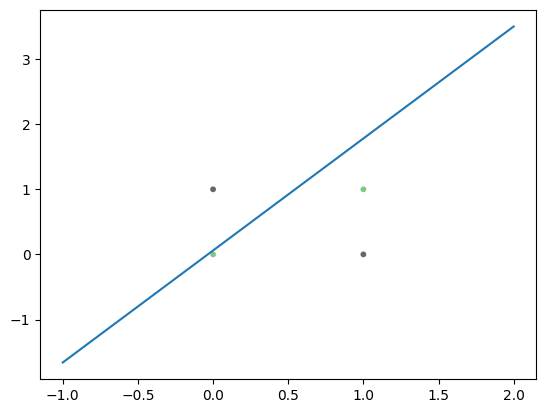

error at epoch 6 for sample [1. 0. 1.] is [-1]
updating weights [-1.13490236  0.65961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.93490236  0.65961213  0.16019057]
add error = 0


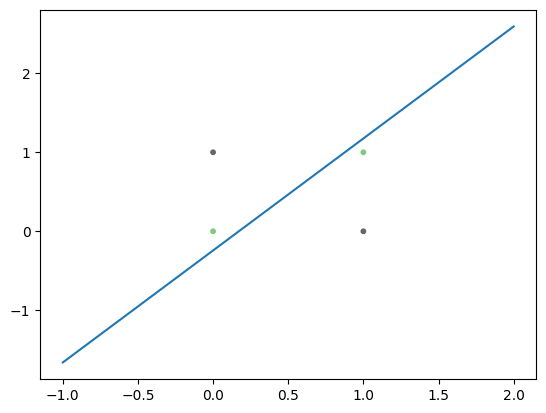

error at epoch 7 for sample [0. 0. 1.] is [1]
updating weights [-0.93490236  0.65961213  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.93490236  0.65961213 -0.03980943]
add error = 0


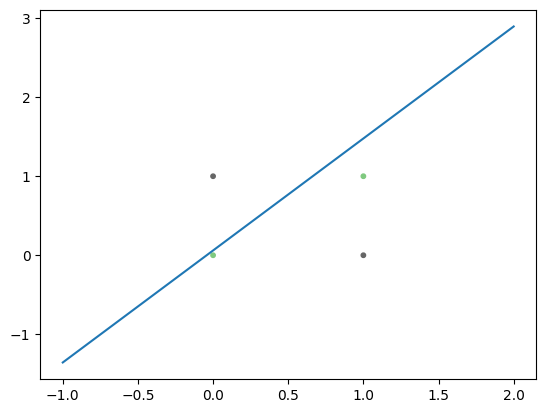

error at epoch 7 for sample [1. 0. 1.] is [-1]
updating weights [-0.93490236  0.65961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.73490236  0.65961213  0.16019057]
add error = 0


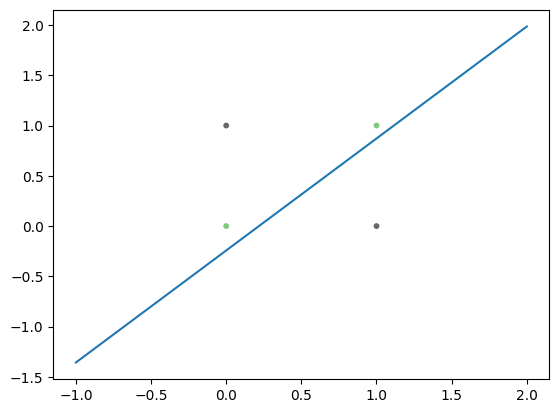

error at epoch 7 for sample [1. 1. 1.] is [1]
updating weights [-0.73490236  0.65961213  0.16019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.93490236  0.45961213 -0.03980943]
add error = 0


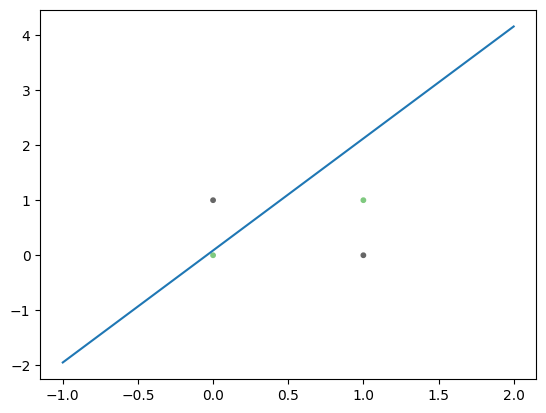

error at epoch 8 for sample [1. 0. 1.] is [-1]
updating weights [-0.93490236  0.45961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.73490236  0.45961213  0.16019057]
add error = 0


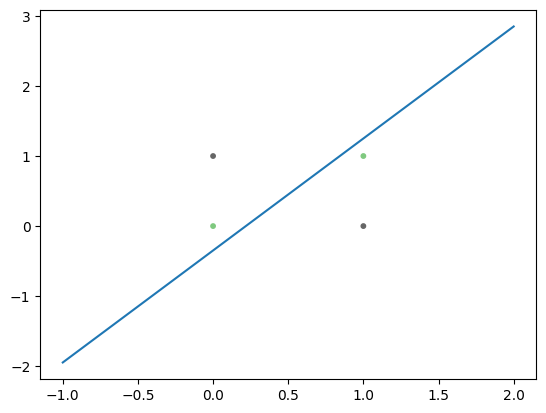

error at epoch 9 for sample [0. 0. 1.] is [1]
updating weights [-0.73490236  0.45961213  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.73490236  0.45961213 -0.03980943]
add error = 0


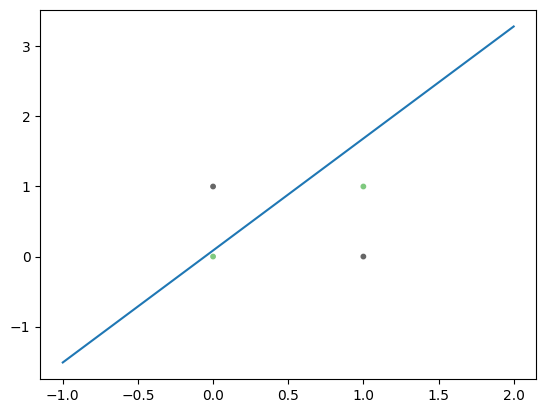

error at epoch 9 for sample [1. 0. 1.] is [-1]
updating weights [-0.73490236  0.45961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.53490236  0.45961213  0.16019057]
add error = 0


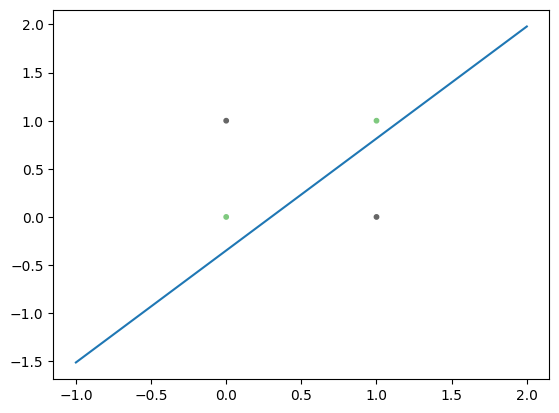

error at epoch 9 for sample [1. 1. 1.] is [1]
updating weights [-0.53490236  0.45961213  0.16019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.73490236  0.25961213 -0.03980943]
add error = 0


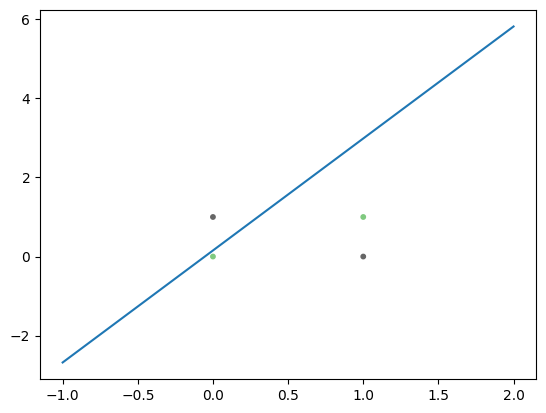

error at epoch 10 for sample [1. 0. 1.] is [-1]
updating weights [-0.73490236  0.25961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.53490236  0.25961213  0.16019057]
add error = 0


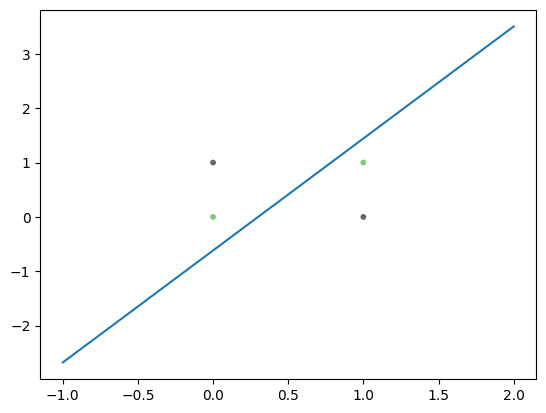

error at epoch 11 for sample [0. 0. 1.] is [1]
updating weights [-0.53490236  0.25961213  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.53490236  0.25961213 -0.03980943]
add error = 0


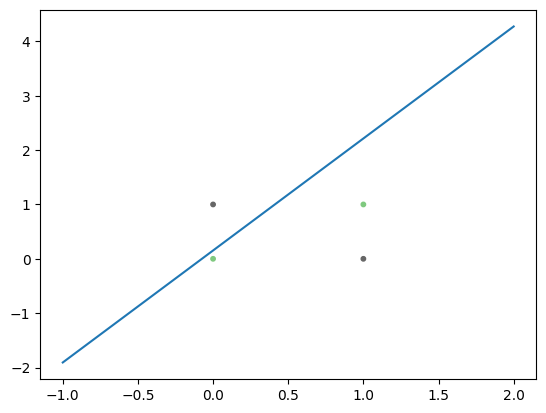

error at epoch 11 for sample [1. 0. 1.] is [-1]
updating weights [-0.53490236  0.25961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.33490236  0.25961213  0.16019057]
add error = 0


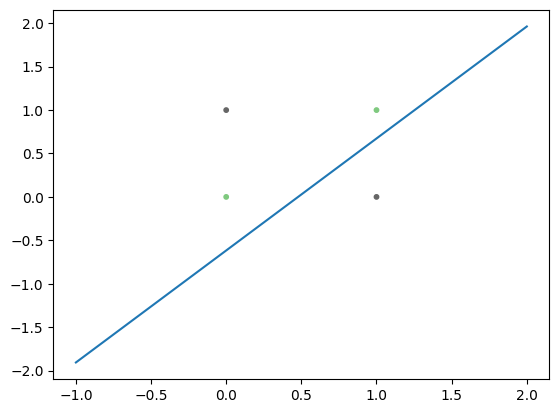

error at epoch 11 for sample [1. 1. 1.] is [1]
updating weights [-0.33490236  0.25961213  0.16019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.53490236  0.05961213 -0.03980943]
add error = 0


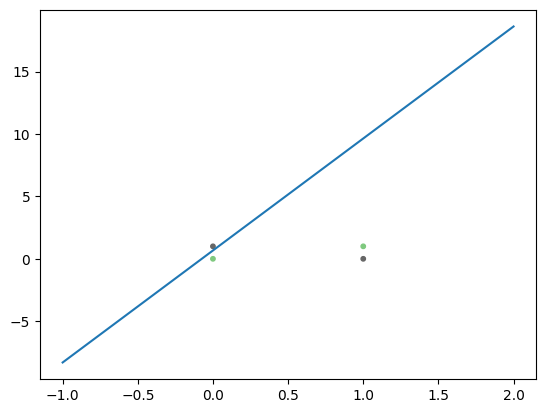

error at epoch 12 for sample [1. 0. 1.] is [-1]
updating weights [-0.53490236  0.05961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.33490236  0.05961213  0.16019057]
add error = 0


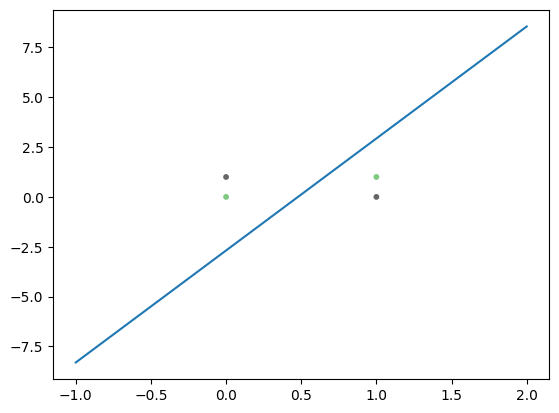

error at epoch 13 for sample [0. 0. 1.] is [1]
updating weights [-0.33490236  0.05961213  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.33490236  0.05961213 -0.03980943]
add error = 0


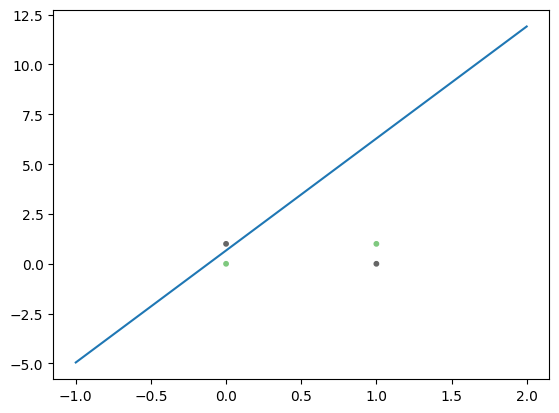

error at epoch 13 for sample [1. 0. 1.] is [-1]
updating weights [-0.33490236  0.05961213 -0.03980943] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.13490236  0.05961213  0.16019057]
add error = 0


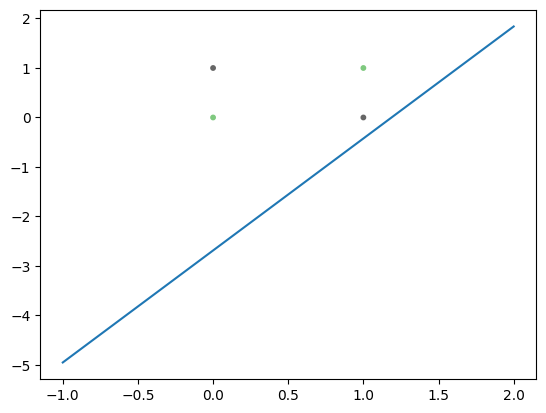

error at epoch 13 for sample [1. 1. 1.] is [1]
updating weights [-0.13490236  0.05961213  0.16019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.33490236 -0.14038787 -0.03980943]
add error = 0


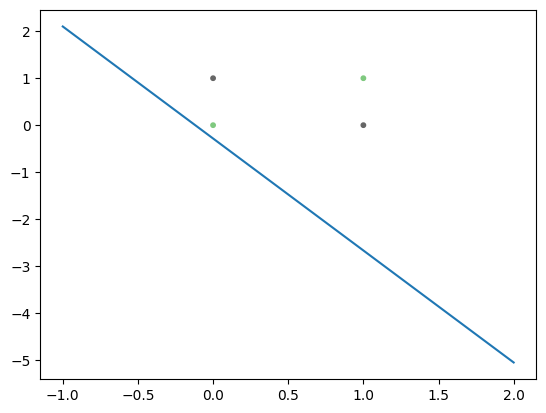

error at epoch 14 for sample [0. 1. 1.] is [-1]
updating weights [-0.33490236 -0.14038787 -0.03980943] for sample [0. 1. 1.] by [-0.  -0.2 -0.2]
new weights [-0.33490236  0.05961213  0.16019057]
add error = 0


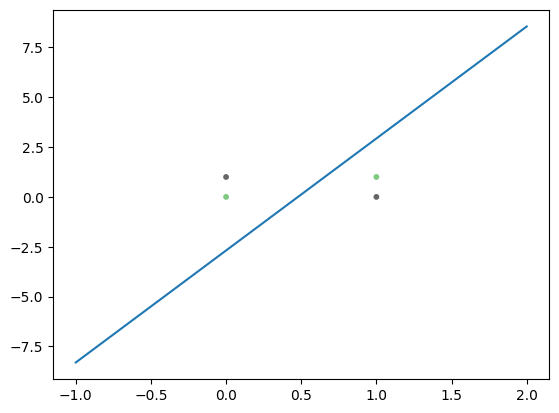

error at epoch 14 for sample [1. 0. 1.] is [-1]
updating weights [-0.33490236  0.05961213  0.16019057] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.13490236  0.05961213  0.36019057]
add error = 0


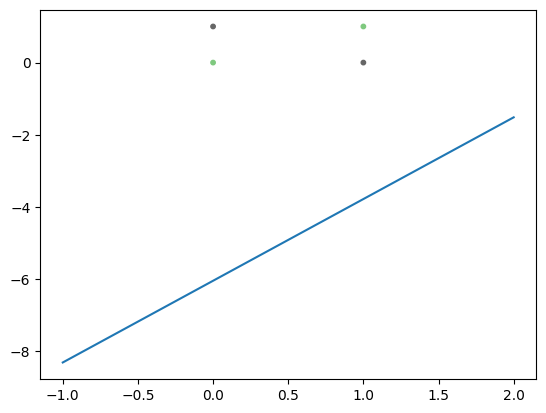

error at epoch 14 for sample [1. 1. 1.] is [1]
updating weights [-0.13490236  0.05961213  0.36019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.33490236 -0.14038787  0.16019057]
add error = 0


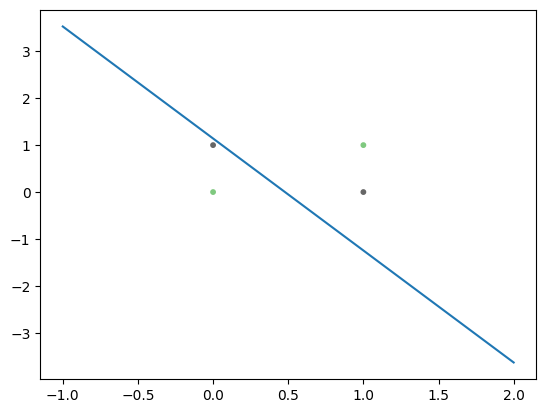

error at epoch 15 for sample [0. 0. 1.] is [1]
updating weights [-0.33490236 -0.14038787  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.33490236 -0.14038787 -0.03980943]
add error = 0


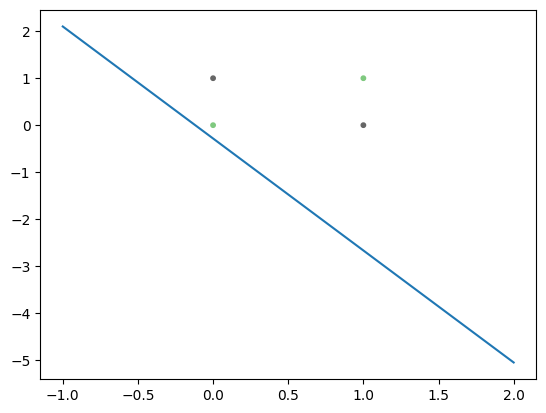

error at epoch 15 for sample [0. 1. 1.] is [-1]
updating weights [-0.33490236 -0.14038787 -0.03980943] for sample [0. 1. 1.] by [-0.  -0.2 -0.2]
new weights [-0.33490236  0.05961213  0.16019057]
add error = 0


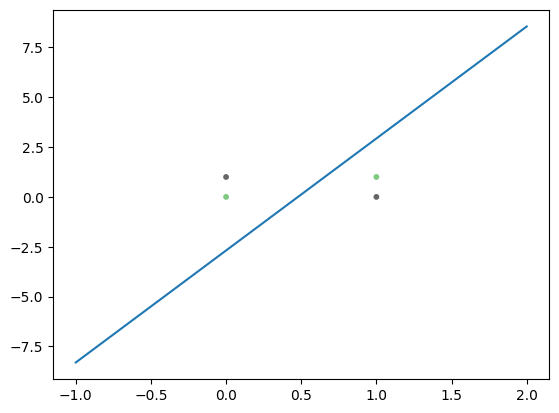

error at epoch 15 for sample [1. 0. 1.] is [-1]
updating weights [-0.33490236  0.05961213  0.16019057] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.13490236  0.05961213  0.36019057]
add error = 0


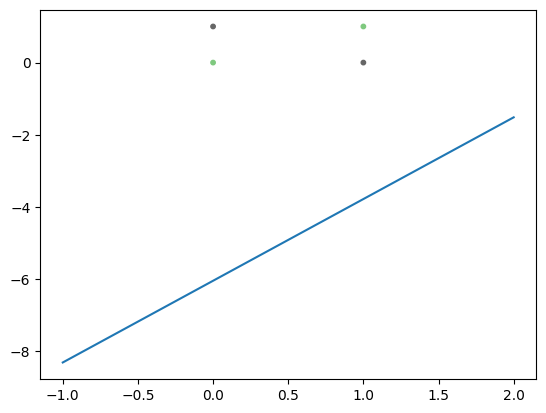

error at epoch 15 for sample [1. 1. 1.] is [1]
updating weights [-0.13490236  0.05961213  0.36019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.33490236 -0.14038787  0.16019057]
add error = 0


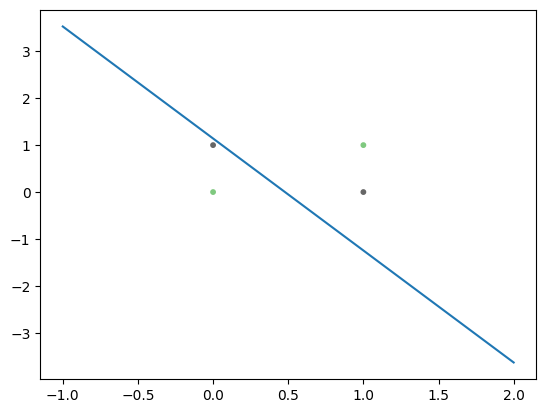

error at epoch 16 for sample [0. 0. 1.] is [1]
updating weights [-0.33490236 -0.14038787  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.33490236 -0.14038787 -0.03980943]
add error = 0


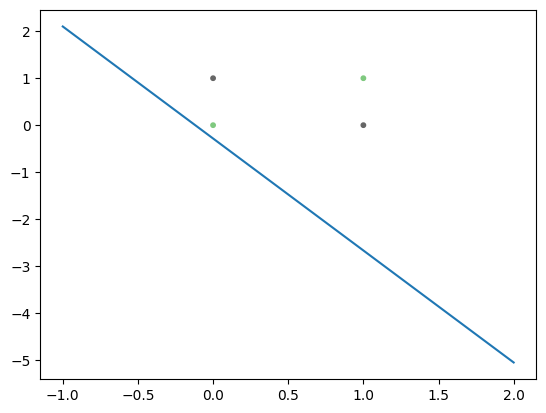

error at epoch 16 for sample [0. 1. 1.] is [-1]
updating weights [-0.33490236 -0.14038787 -0.03980943] for sample [0. 1. 1.] by [-0.  -0.2 -0.2]
new weights [-0.33490236  0.05961213  0.16019057]
add error = 0


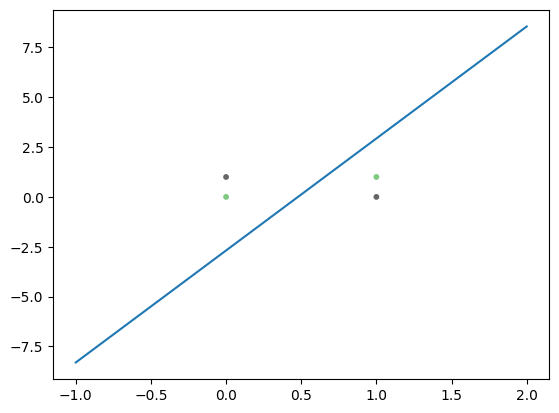

error at epoch 16 for sample [1. 0. 1.] is [-1]
updating weights [-0.33490236  0.05961213  0.16019057] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.13490236  0.05961213  0.36019057]
add error = 0


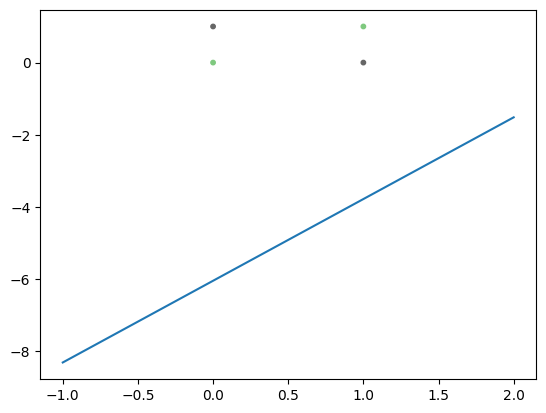

error at epoch 16 for sample [1. 1. 1.] is [1]
updating weights [-0.13490236  0.05961213  0.36019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.33490236 -0.14038787  0.16019057]
add error = 0


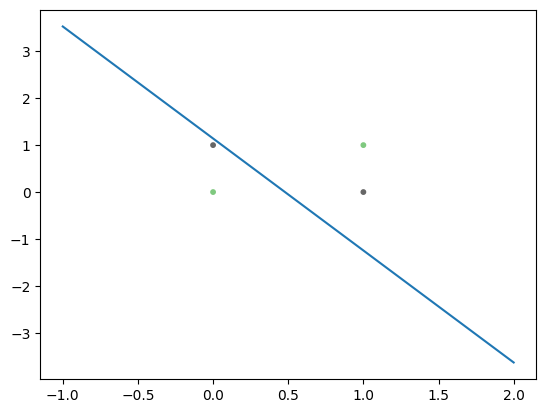

error at epoch 17 for sample [0. 0. 1.] is [1]
updating weights [-0.33490236 -0.14038787  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.33490236 -0.14038787 -0.03980943]
add error = 0


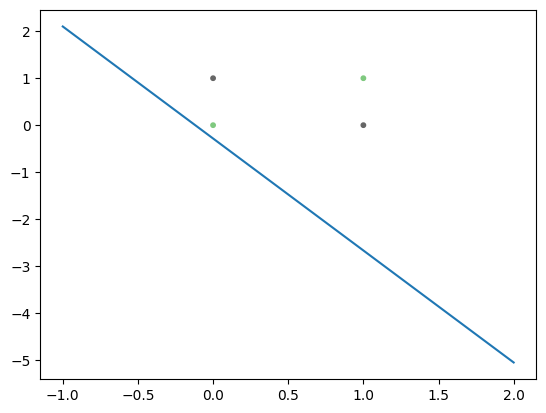

error at epoch 17 for sample [0. 1. 1.] is [-1]
updating weights [-0.33490236 -0.14038787 -0.03980943] for sample [0. 1. 1.] by [-0.  -0.2 -0.2]
new weights [-0.33490236  0.05961213  0.16019057]
add error = 0


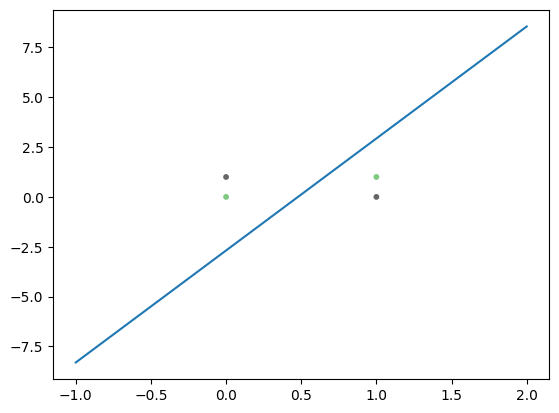

error at epoch 17 for sample [1. 0. 1.] is [-1]
updating weights [-0.33490236  0.05961213  0.16019057] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.13490236  0.05961213  0.36019057]
add error = 0


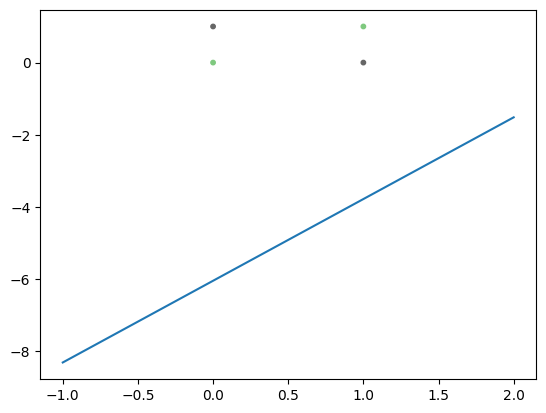

error at epoch 17 for sample [1. 1. 1.] is [1]
updating weights [-0.13490236  0.05961213  0.36019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.33490236 -0.14038787  0.16019057]
add error = 0


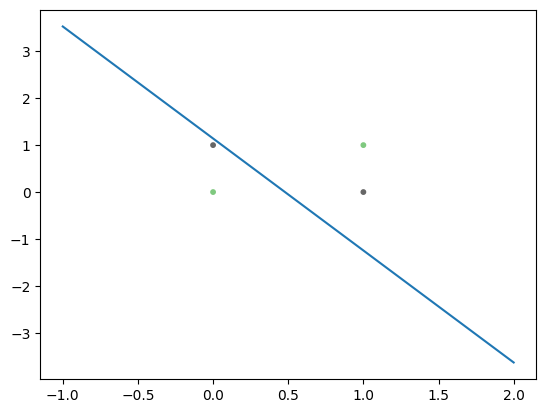

error at epoch 18 for sample [0. 0. 1.] is [1]
updating weights [-0.33490236 -0.14038787  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.33490236 -0.14038787 -0.03980943]
add error = 0


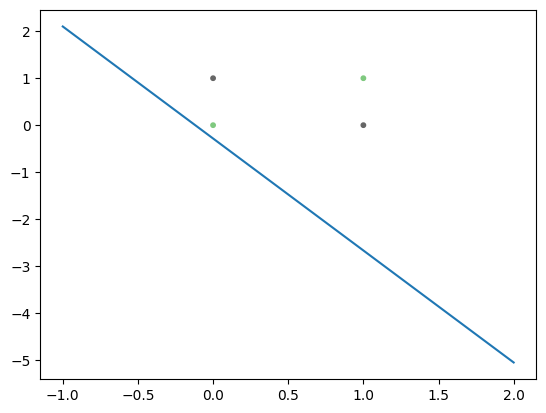

error at epoch 18 for sample [0. 1. 1.] is [-1]
updating weights [-0.33490236 -0.14038787 -0.03980943] for sample [0. 1. 1.] by [-0.  -0.2 -0.2]
new weights [-0.33490236  0.05961213  0.16019057]
add error = 0


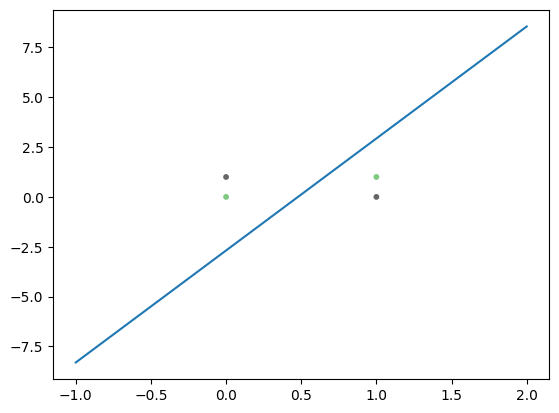

error at epoch 18 for sample [1. 0. 1.] is [-1]
updating weights [-0.33490236  0.05961213  0.16019057] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.13490236  0.05961213  0.36019057]
add error = 0


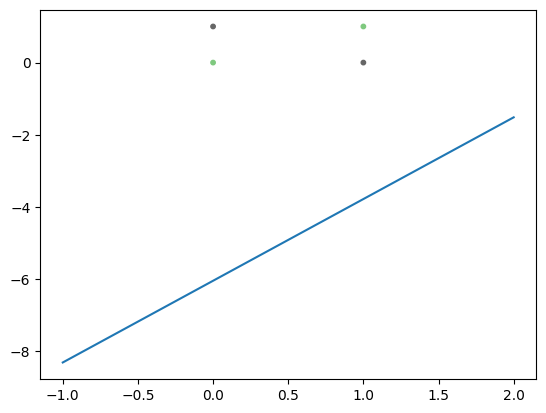

error at epoch 18 for sample [1. 1. 1.] is [1]
updating weights [-0.13490236  0.05961213  0.36019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.33490236 -0.14038787  0.16019057]
add error = 0


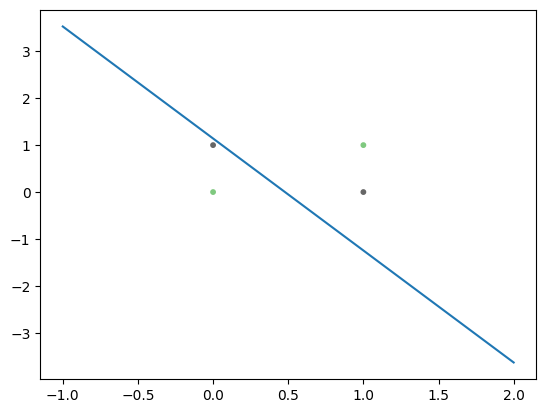

error at epoch 19 for sample [0. 0. 1.] is [1]
updating weights [-0.33490236 -0.14038787  0.16019057] for sample [0. 0. 1.] by [0.  0.  0.2]
new weights [-0.33490236 -0.14038787 -0.03980943]
add error = 0


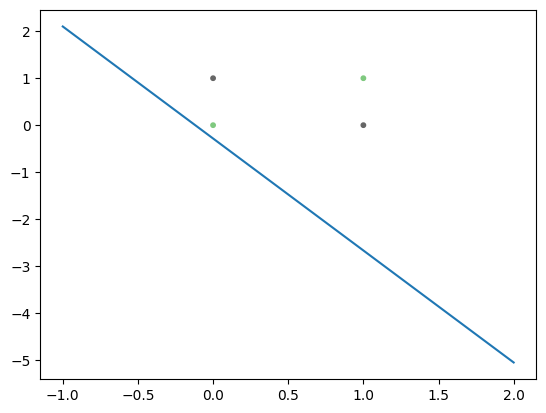

error at epoch 19 for sample [0. 1. 1.] is [-1]
updating weights [-0.33490236 -0.14038787 -0.03980943] for sample [0. 1. 1.] by [-0.  -0.2 -0.2]
new weights [-0.33490236  0.05961213  0.16019057]
add error = 0


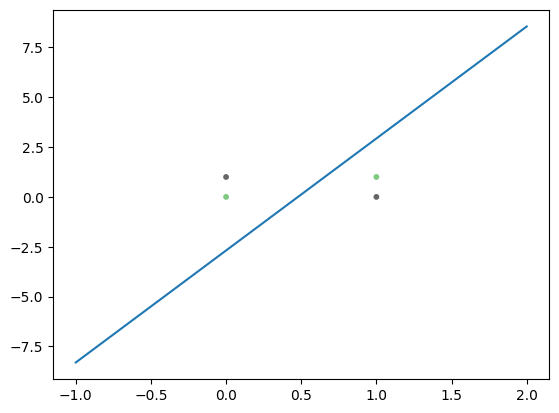

error at epoch 19 for sample [1. 0. 1.] is [-1]
updating weights [-0.33490236  0.05961213  0.16019057] for sample [1. 0. 1.] by [-0.2 -0.  -0.2]
new weights [-0.13490236  0.05961213  0.36019057]
add error = 0


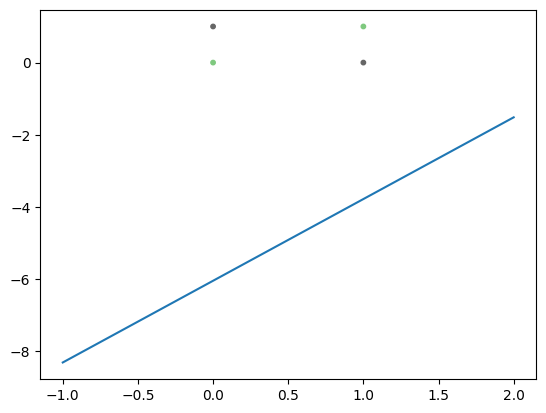

error at epoch 19 for sample [1. 1. 1.] is [1]
updating weights [-0.13490236  0.05961213  0.36019057] for sample [1. 1. 1.] by [0.2 0.2 0.2]
new weights [-0.33490236 -0.14038787  0.16019057]
add error = 0


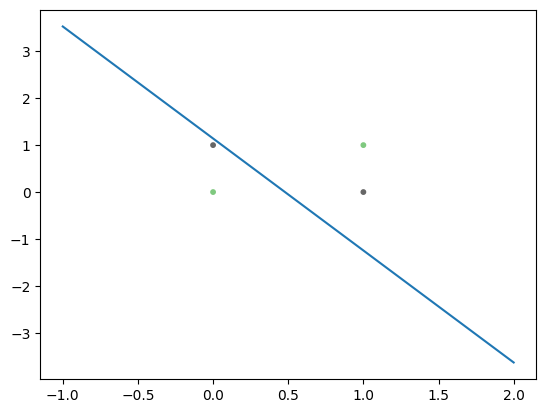

In [8]:
print("Enter perceptron training...")
p = Percep(2, lr = 0.2)
p.fit(X, y, epoch=20)

### Gradient Descent

In [9]:
def func1(x):
    return x**2 -2*x +2

def grad1(x):
    return 2*x - 2

def func2(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

def grad2_x(x,y):
    return -2*(1-x) -400*x*(y-x**2)

def grad2_y(x,y):
    return 200*(y-x**2)




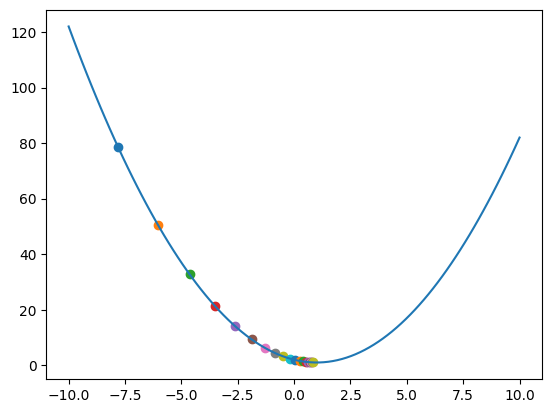

In [10]:
x = np.linspace(-10,10,100)
y = func1(x)
f,a = plt.subplots(1,1)

li, = a.plot(x,y)
lr = 0.1

wx = -10
pts = []
for i in range(1, 20):
    pts.append(wx)
    g = func1(wx)
    wx -= lr*grad1(wx)


    plt.scatter(wx, func1(wx))
    

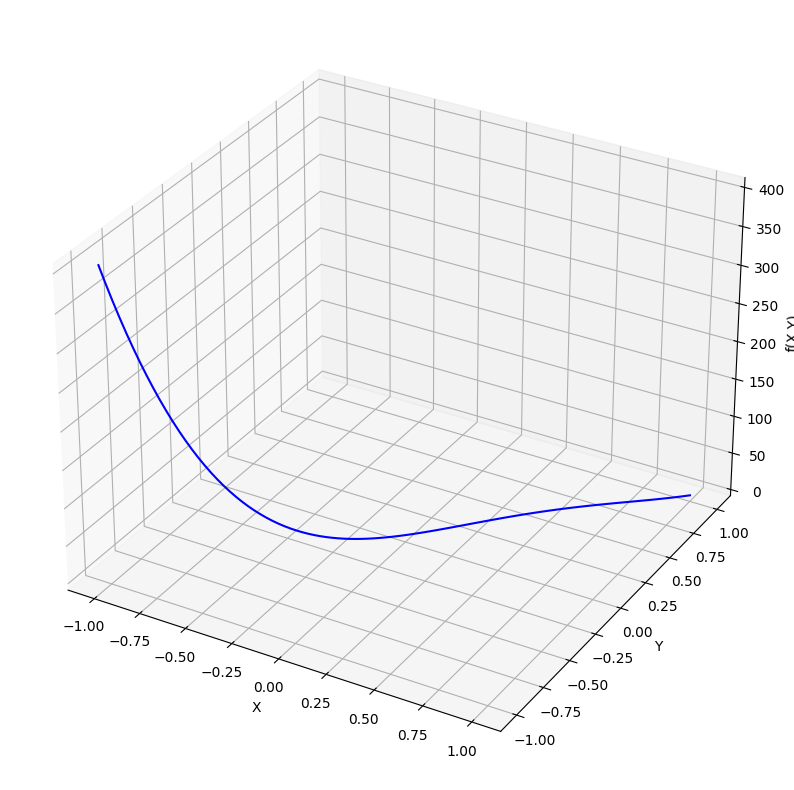

OverflowError: (34, 'Numerical result out of range')

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')


x1 = np.linspace(-100,100,100)
x2 = np.linspace(-100,100,100)
y = func2(x1,x2)

ax.plot(x1,x2,y, c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')

# Show the plot
plt.show()

lr = 0.1

wx = -1
wy = -1

pts_x = []
pts_y = []
for i in range(1, 20):
    pts_x.append(wx)
    pts_y.append(wy)

    
    gyx = func2(wx,wy)

    
    wx -= lr*grad2_x(wx,wy)
    wy -= lr*grad2_y(wx,wy)

    

    ax.scatter(wx, wy, func2(wx,wy))

OverflowError: (34, 'Numerical result out of range')

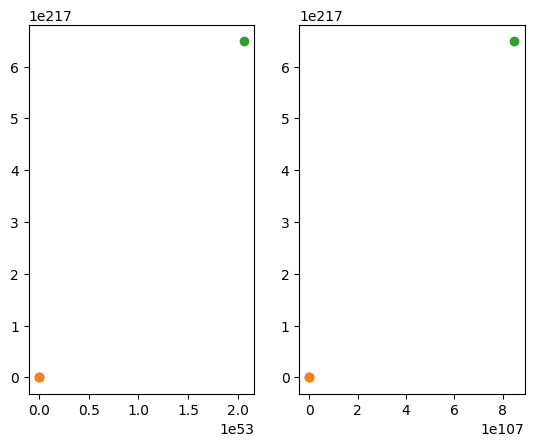

In [16]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
fxy = func2(x,y)
f,a = plt.subplots(1,2)

li, = a[0].plot(x,fxy)
lu, = a[1].plot(y,fxy)

lr = 0.1

wx = -10
wy = -10

pts_x = []
pts_y = []
for i in range(1, 20):
    pts_x.append(wx)
    pts_y.append(wy)
    
    wx -= lr*grad2_x(wx,wy)
    wy -= lr*grad2_y(wx,wy)

    

    a[0].scatter(wx, func2(wx,wy))
    a[1].scatter(wy, func2(wx,wy))

print(pts_x,pts_y)

In [15]:
100*(1-1**2)**2

0